In [1]:
options(warn = -1, scipen = 999)
pacotes <- c("tidyverse","rbcb","ggthemes","ipeadatar","seasonal", "forecast")
for(i in pacotes){
    suppressPackageStartupMessages({
        library(i, character.only = T)
    })
}

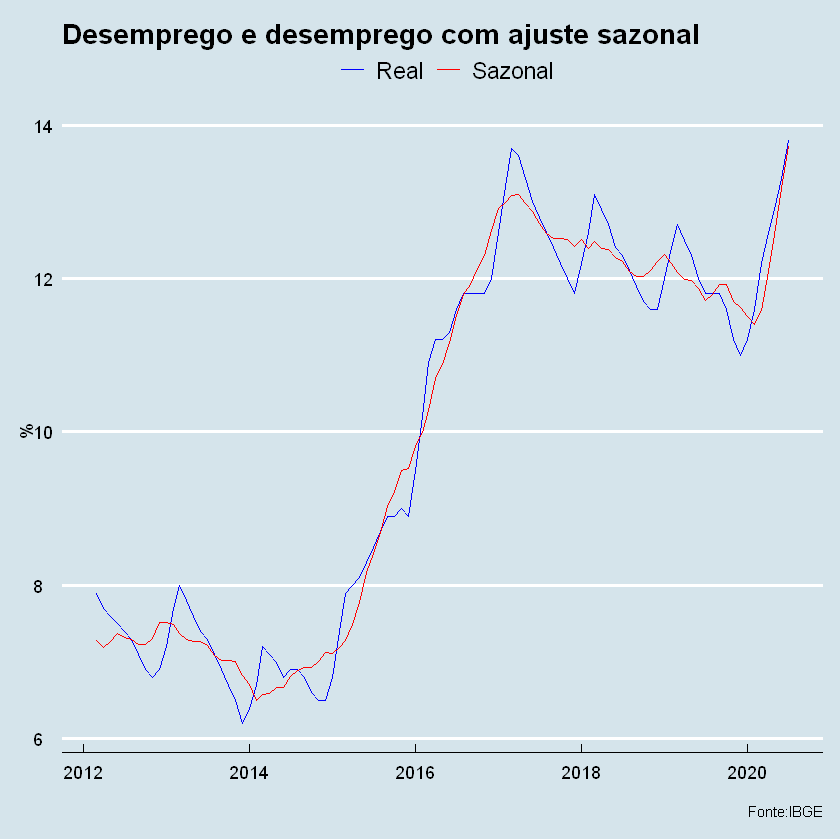

In [2]:
desem <- ipeadata("PAN12_TDESOC12", language = "br")
desemp <- data.frame(Desemprego = desem$value)
desemp_ts <- ts(desemp$Desemprego, start = c(2012,03), frequency = 12)
dec <- decompose(desemp_ts)
desemp_adj <- seasadj(dec)
desemprego <- data.frame(Data = desem$date,Real = desemp$Desemprego, Sazonal = desemp_adj)
ggplot(desemprego, aes(x = Data))+
  geom_line(aes(y = Real, col = "Real"))+
  geom_line(aes(y = Sazonal, col = "Sazonal"))+
  scale_colour_manual("", values = c("blue","red"))+
  labs(x = "", y = "%", title = "Desemprego e desemprego com ajuste sazonal",
       caption = "Fonte:IBGE")+
  theme_economist()

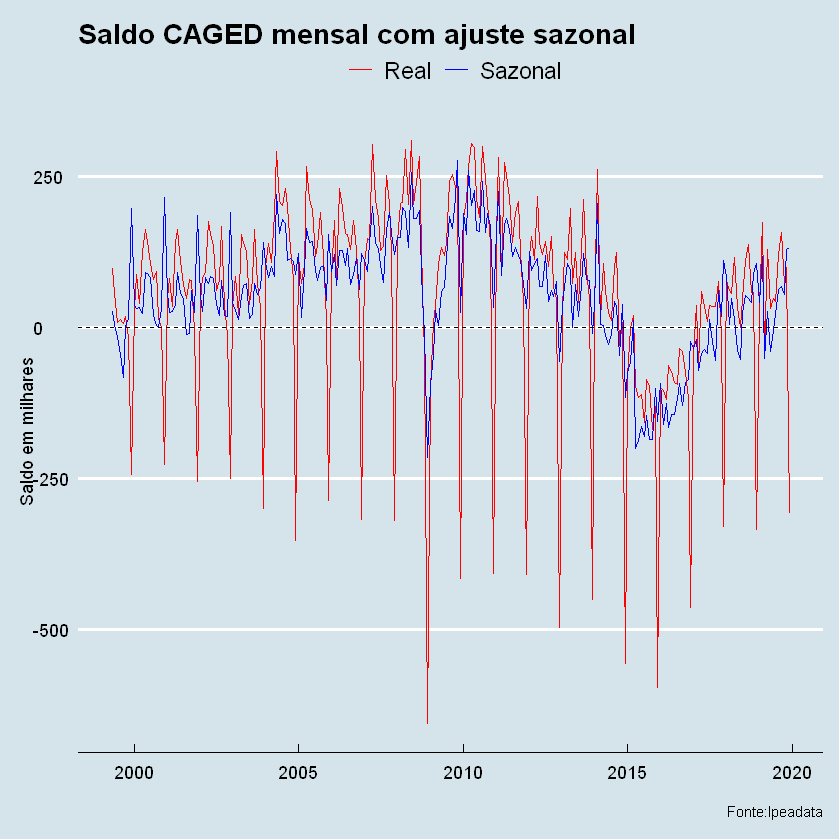

In [3]:
caged <- ipeadata(code = "CAGED12_SALDO12", language = "br")
caged[,c(1,4,5)] <- NULL
caged_ts <- ts(caged$value, start = c(1999,05), frequency = 12)
dec <- decompose(caged_ts)
caged_adj <- seasadj(dec)
caged_t <- data.frame(Data = caged$date, Real = caged$value, Sazonal = caged_adj)
ggplot(caged_t, aes(x = Data))+
  geom_line(aes(y = Real/1000, col = "Real"))+
  geom_line(aes(y = Sazonal/1000, col = "Sazonal"))+
  theme_economist()+
  labs(x = "", y = "Saldo em milhares",
       title = "Saldo CAGED mensal com ajuste sazonal", caption = "Fonte:Ipeadata")+
  geom_hline(yintercept = 0, col = "black", linetype = 2)+
  scale_colour_manual("", values = c("red","blue"))